In [123]:
def rename(fn):
    filename=fn
    imp_path=r"C:\Users\dominikbenz.DASTUD\Surfdrive\PhD (Photocatalysis for water treatment)\(1) EXPERIMENTS\Python\photocat_test_python\RawData_20191023\WLData1\{}".format(filename)
    import pandas as pd
    my_data=pd.read_csv(imp_path, sep=', ', skiprows=10 , encoding='utf16', names=["wavelength", "absorption"])
    #print(my_data)
        # creating a modified dataset without the annotation of a valley or peak in the dataset
    mod_abs=[]
    for a in my_data.absorption:
        if ',' in a:
            a=(a[:a.find(',')])
        else:
            a=a    
        mod_abs.append(float(a)) 
    my_data.absorption=mod_abs

        #plotting the absorption vs wavelenght
    my_data.plot(x ="wavelength", y="absorption", kind ="scatter")

        #read in data correlation file
    corr_path=r"C:\Users\dominikbenz.DASTUD\Surfdrive\PhD (Photocatalysis for water treatment)\(1) EXPERIMENTS\Python\photocat_test_python\RawData_20191023\WLData1\Data_correlation.txt"
    my_corr=pd.read_csv(corr_path, sep=',', names=["Original", "Sample_name", "Time"])
    print(my_corr)
        # generate exporting path
    exp_name=my_corr.Sample_name[my_corr.Original==2].item()
    print (exp_name)
    exp_path=r"C:\Users\dominikbenz.DASTUD\Surfdrive\PhD (Photocatalysis for water treatment)\(1) EXPERIMENTS\Python\photocat_test_python\RawData_20191023\WLData1\{}.csv".format(exp_name)
    print(exp_path)
    my_data.to_csv(exp_path)
    
   
# create empty list for Absorption vs time
Abs_list=[]
x=my_data.absorption[my_data.wavelength==629].item()
Abs_list.append(x)

C:\Users\dominikbenz.DASTUD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


   original Sample_name
0         1      DB01-7
1         2      DB01-6
2         3      DB01-5
3         4      DB01-4
4         5      DB01-3
5         6      DB01-2
6         7      DB01-1
7         8      DB01-0
 DB01-6
C:\Users\dominikbenz.DASTUD\Surfdrive\PhD (Photocatalysis for water treatment)\(1) EXPERIMENTS\Python\photocat_test_python\RawData_20191023\WLData1\ DB01-6.csv


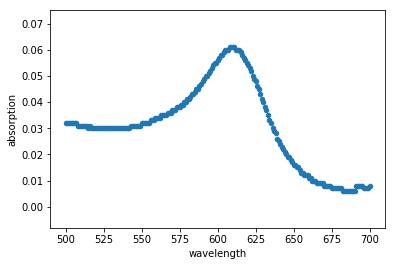

In [126]:
rename("ScanData_2.csv")

In [63]:
#find Absorption at 629 nm
x=my_data.absorption[my_data.wavelength==629].item()
print(x)

0.533


In [119]:
    #read in data correlation file
corr_path=r"C:\Users\dominikbenz.DASTUD\Surfdrive\PhD (Photocatalysis for water treatment)\(1) EXPERIMENTS\Python\photocat_test_python\RawData_20191023\WLData1\Data_correlation.txt"
my_corr=pd.read_csv(corr_path, sep=',', names=["original", "Sample_name"])
print(my_corr)
    # generate exporting path
exp_name=my_corr.Sample_name[my_corr.original==2].item()
print (exp_name)
exp_path=r"C:\Users\dominikbenz.DASTUD\Surfdrive\PhD (Photocatalysis for water treatment)\(1) EXPERIMENTS\Python\photocat_test_python\RawData_20191023\WLData1\{}.csv".format(exp_name)
print(exp_path)
#my_data.to_csv(exp_path)

   original Sample_name
0         1      DB01-7
1         2      DB01-6
2         3      DB01-5
3         4      DB01-4
4         5      DB01-3
5         6      DB01-2
6         7      DB01-1
7         8      DB01-0
 DB01-6
C:\Users\dominikbenz.DASTUD\Surfdrive\PhD (Photocatalysis for water treatment)\(1) EXPERIMENTS\Python\photocat_test_python\RawData_20191023\WLData1\ DB01-6.csv


   original Sample_name  Time  Absorption
0         1      DB01-7    50         0.5
1         2      DB01-6    40         1.0
2         3      DB01-5    30         1.5
3         4      DB01-4    25         3.0
4         5      DB01-3    20         6.0
5         6      DB01-2    10        12.0
6         7      DB01-1     5        25.0
7         8      DB01-0     0        50.0


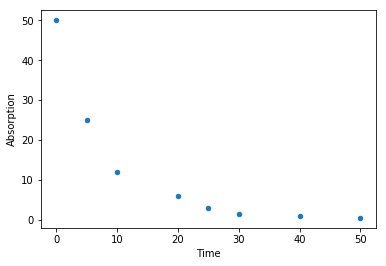

In [171]:
    #correlating absorption data with 
corr_path=r"C:\Users\dominikbenz.DASTUD\Surfdrive\PhD (Photocatalysis for water treatment)\(1) EXPERIMENTS\Python\photocat_test_python\RawData_20191023\WLData1\Data_correlation.txt"
my_corr=pd.read_csv(corr_path, sep=',', names=["original", "Sample_name", "Time"])
#x is dummydata for abbsorption values at 629 nm
x=[0.5,1,1.5,3,6,12,25,50]
my_corr['Absorption']=x

print(my_corr) 
my_corr.plot(x ="Time", y="Absorption", kind ="scatter")

In [172]:
import numpy as np
    #calculate ln
ln_series=[]
for a in my_corr.Absorption:
    ln_data=np.log(my_corr.Absorption[0]/a)
    ln_series.append(float(ln_data))
    
    #implement ln_series in data file
my_corr['ln']=ln_series
    #plot ln vs time
my_corr.plot(x ="Time", y="ln", kind ="scatter")

[0.0, -0.6931471805599453, -1.0986122886681098, -1.791759469228055, -2.4849066497880004, -3.1780538303479458, -3.912023005428146, -4.605170185988091]


In [180]:
from sklearn.linear_model import LinearRegression
X = my_corr.Time.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = my_corr.ln.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)

IndexingError: Too many indexers